<h1>Analysis of the noise measurement of the DC lines</h1>

In [5]:
sample_name = 'noise_dc_lines_adwin'                    # name of the chip in the fridge
db_name = '2021_12_01_noise_dc_lines_adwin'   # name of the database
user = 'smc'                               # who is performing measurements

<h3>Basic imports</h3>

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from resonator_tools import circuit

import qcodes as qc
from qcodes import initialise_database, load_by_run_spec
from qcodes.dataset.plotting import plot_by_id

import scipy.optimize

db_path  = os.path.join(r'D:\QMET' + '\\' + sample_name + '\\', db_name)

<h2>Data loading</h2>

In [7]:
RUN_ID = 8
qc.initialise_or_create_database_at(db_path)
dataset = qc.load_by_run_spec( captured_run_id=RUN_ID)
print(dataset)

#plt.plot(f, phi)

results #8@D:\QMET\noise_dc_lines_adwin\2021_12_01_noise_dc_lines_adwin
-----------------------------------------------------------------------
T2_3 - numeric
adwin_input_1_points - numeric
adwin_Input_1 - numeric


In [12]:
temperature = dataset.get_parameter_data('adwin_Input_1')['adwin_Input_1']['T2_3']
phi = dataset.get_parameter_data('adwin_Input_1')['adwin_Input_1']['adwin_Input_1']

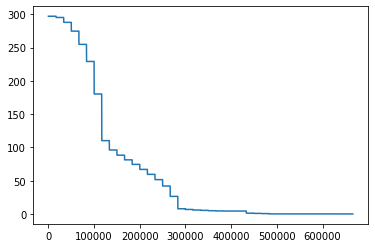

In [15]:
plt.plot(temperature)

In [30]:
r_temp = np.reshape(temperature, (40, temperature.shape[0]//40))
r_noise = np.reshape(phi, (40, phi.shape[0]//40))

In [33]:
f_noise = np.fft.fft(r_noise, axis=1)

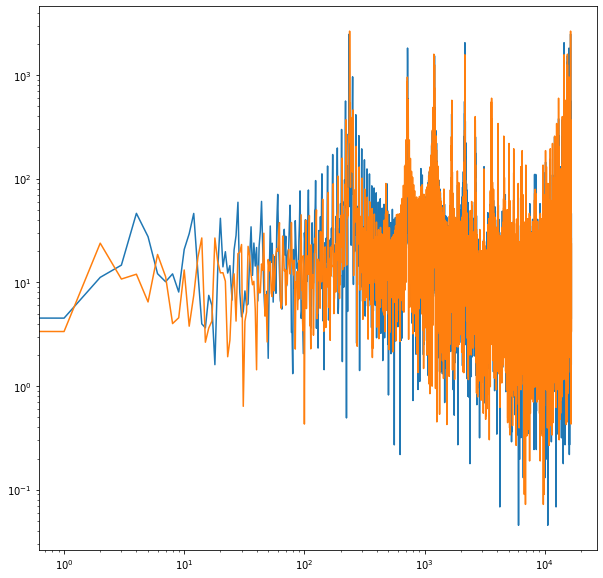

In [48]:
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
# ax1= fig.add_subplot(122)
ax0.loglog(np.abs(f_noise[0]))
ax0.loglog(np.abs(f_noise[-1]))
#ax0.set_xlim([1,1e3])